Aunque no lo sepáis, si alguna vez habéis usado la [regresión lineal](https://en.wikipedia.org/wiki/Linear_regression), habréis usado una de las formas más simples y fácilmente interpretables del aprendizaje supervisado ([supervised learning](https://en.wikipedia.org/wiki/Supervised_learning)), una serie de técnicas enmarcadas dentro del amplio campo del aprendizaje automático ([machine learning](https://en.wikipedia.org/wiki/Machine_learning)), tan de moda últimamente.

La regresión lineal se usa para hacer predicción de variables cuantitativas, principalmente, y, aunque pueda parecer una técnica simple, sigue estando vigente pues se puede aplicar de forma sencilla a multitud de problemas. Además, sirve como punto de entrada para definir técnicas más complejas y sofisticadas dentro del [análisis de regresión](https://en.wikipedia.org/wiki/Regression_analysis).

En este tutorial no pretendo quedarme en lo más básico de la regresión lineal simple, obtención de la relación entre una variable predictora, ***X***, y la variable cuantitativa que queremos obtener, ***Y***, y su coeficiente de correlación. En eso se quedan todas las entradas de blog y no hay que repetir lo que ya existe.

Como siempre, antes de nada importamos las librerías que usaremos:

In [1]:
import numpy as np

from scipy import stats

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.html.widgets import interact
from IPython.html import widgets

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## A tener en cuenta antes de leer nada de lo que viene a continuación

> Statisticians, like artists, have the bad habit of falling in love with their models
>
> -- <cite>George Box</cite>

## Regresión lineal simple con Python, versión TL;DR. 

O sí, vamos a repetir la versión corta ya que, si eso es lo que buscas, así no tienes que seguir perdiendo el tiempo buscando más. Vamos a ver como se haría con numpy en unas pocas líneas.

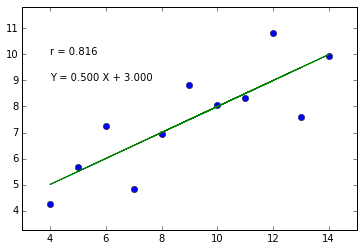

In [2]:
# X e Y serán el primer conjunto del cuarteto de Anscombe 
# (https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
X = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
Y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

# Calculamos los coeficientes del ajuste (a X + b)
a, b = np.polyfit(X, Y, 1)
# Calculamos el coeficiente de correlación
r = np.corrcoef(X, Y)

# Dibujamos los datos para poder visualizarlos y ver si sería lógico 
# considerar el ajuste usando un modelo lineal
plt.plot(X, Y, 'o')
plt.xlim(np.min(X) -1, np.max(X) +1)
plt.ylim(np.min(Y) -1, np.max(Y) +1)
plt.plot(X, a * X + b)
plt.text(4, 10, 'r = {0:2.3f}'.format(r[0,1]))
plt.text(4, 9, 'Y = {0:2.3f} X + {1:2.3f}'.format(a, b))

## Regresión lineal simple, versión un poco más larga...

Como ya hemos comentado, con la regresión lineal simple lo que buscamos es la relación entre un predictor, ***X***, y un predictando, ***Y***, asumiendo que la relación entre ambas sería aproximadamente lineal. La relación la podemos escribir así:

$$Y = a X + b$$

donde $a$ y $b$ son dos constantes (coeficientes o parámetros del modelo lineal) que definen, respectivamente, la pendiente y el término independiente (u ordenada en el origen o intercepto). Una vez que conocemos $\hat{a}$ y $\hat{b}$ (\*), obtenidos a partir de los datos de entrenamiento (conjunto de datos que usamos para obtener los parámetros del modelo) podemos predecir nuevos valores ***y*** basándonos en valores ***x***. 

<div class="alert alert-info">(*) Todos los valores estimados los pondremos con una caperuza (acento circunflexo, sombrero,...) para distinguirlos de valores teóricos que, en muchos casos, desconoceremos.</div>

$$\hat{y} = \hat{a} x + \hat{b}$$

Para conocer $\hat{a}$ y $\hat{b}$ usamos los datos disponibles, como hemos comentado anteriormente. Tenemos los siguientes pares de datos:

$$(x_{1}, y_{1}), (x_{2}, y_{2}), (x_{3}, y_{3}),..., (x_{n}, y_{n})$$

que representan medidas de ***X*** e ***Y***. Lo que trataremos de hacer con estos datos será obtener los parámetros del ajuste lineal, $\hat{a}$ y $\hat{b}$, de tal forma que el modelo lineal se ajuste bien a los datos, es decir, queremos encontrar una recta con una pendiente y una ordenada en el origen que minimice la distancia a todos los puntos $(x_{i}, y_{i})$

Existen varias formas de medir esta proximidad y, entre ellos, el más usado es el ajuste por mínimos cuadrados ([least squares](https://en.wikipedia.org/wiki/Least_squares)).

### Ajuste por mínimos cuadrados

El método de mínimos cuadrados encontrará el valor óptimo cuando la suma de los residuos al cuadrado, $RSS=\sum_{i=1}^{n}{r_i}^2$ (RSS, Residual Sum of Squares), sea mínima.

El residuo se define como la diferencia entre el valor actual de la variable dependiente y el valor predicho por el modelo, $r_{i} = y_{i} - \hat{y}_{i}$. De esta forma tendremos lo siguiente:

$$\frac{\partial{RSS}}{\partial{\hat{a}}} = 0 \longrightarrow \hat{a} = \frac{\sum^{n}_{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sum^{n}_{i=1}(x_i - \bar{x})^2}$$

$$\frac{\partial{RSS}}{\partial{\hat{b}}} = 0 \longrightarrow \hat{b} = \bar{y} - \hat{b}\bar{x}$$

donde $\bar{x}$ e $\bar{y}$ son los promedios de las muestras.

Las ecuaciones anteriores son el resultado para el caso concreto de la regresión lineal simple. Si queréis generalizar a regresión lineal múltiple, más de un término independiente, a lo mejor lo veremos más adelante si encuentro el tiempo necesario. Para los impacientes, si en realidad alguna vez lleguemos a verlo, podéis visitar [este enlace](https://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29#Derivation_of_the_normal_equations).

### Ejemplo práctico del cálculo de los parámetros

Como estamos usando un conjunto de datos pequeños ([uno de los casos del cuarteto de Anscombe](http://pybonacci.org/2012/10/05/la-importancia-de-inspeccionar-los-datos/)) podemos realizar el cálculo de forma manual y así ver, paso a paso, como sería:

* 1 - Calculamos el valor medio de ***X*** e ***Y***
* 2 - Calculamos $\hat{a}$ y $\hat{b}$ con la ayuda de los valores medios previamente calculados
* 3 - Comparamos el resultado con lo que obtenemos usando `numpy.polyfit`

In [3]:
# Los datos de partida
X = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
Y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

# Primero calculamos la media de X e Y
xmean = X.mean()
ymean = Y.mean()

# Como b depende de a primero hemos de obtener a
ahat = np.sum((X - xmean) * (Y - ymean)) / np.sum((X - xmean)**2)
bhat = ymean - ahat * xmean

# Calculamos los valores usando numpy.polyfit
a, b = np.polyfit(X, Y, 1)

# Mostramos resultados
print('ajuste paso a paso, a, b = ', ahat, bhat)
print('ajuste con polyfit, a, b = ', a, b)
print(np.testing.assert_almost_equal(ahat, a, decimal = 7),
      np.testing.assert_almost_equal(bhat, b, decimal = 7))

ajuste paso a paso, a, b =  0.500090909091 3.00009090909
ajuste con polyfit, a, b =  0.500090909091 3.00009090909
None None


Podemos ver como el valor mínimo para los mínimos cuadrados se encuentra en ese punto si dibujamos la suma de residuos al cuadrado (RSS) en función de $a$ y $b$. En el siguiente gráfico, si se ejecuta de forma interactiva, usando `interact`, veremos que si modificamos el valor de la pendiente y de la ordenada en el origen el valor de RSS será superior al optimo excepto cuando $\hat{a} = 0.5, \hat{b} = 3$.

<function __main__.plotea>

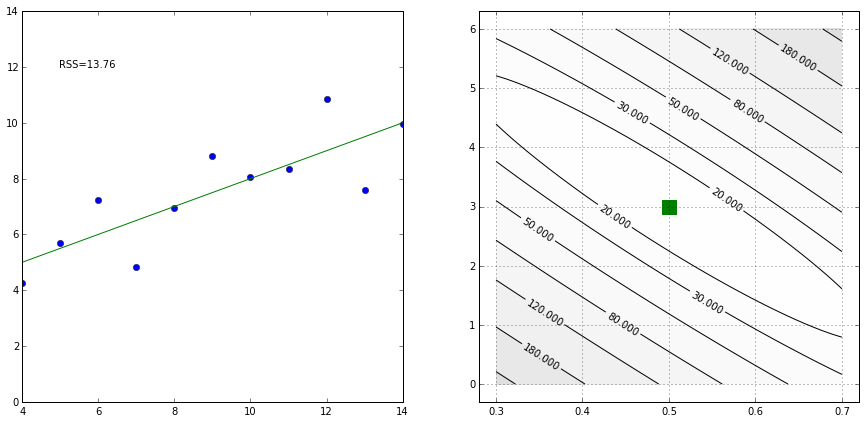

In [4]:
a = np.linspace(0.3,0.7,100)
b = np.linspace(0,6,100)
RSS = np.empty((len(a), len(b)))
for i, ai in enumerate(a):
    for j, bj in enumerate(b):
        RSS[i, j] = np.sum((Y - bj - ai * X)**2)

def plotea(ai, bi):
    xx, yy = np.meshgrid(b, a)    
    levels = np.array([10,20,30,50,80,120,180,250,400,1000,2000])
    colors = 1 - levels / levels.max()
    plt.figure(figsize = (15,7))
    plt.subplot(121)
    plt.plot(X, Y, 'o')
    plt.plot([X.min(), X.max()], 
             [X.min() * ai + bi, X.max() * ai + bi])
    plt.text(5, 12, 'RSS={:5.2f}'.format(np.sum((Y - bi - ai * X)**2)))
    plt.ylim(0,14)
    plt.subplot(122)
    plt.contourf(yy, xx, RSS, levels = levels, colors = colors.astype('str'))
    CS = plt.contour(yy, xx, RSS, levels = levels, colors = 'k')
    plt.clabel(CS, inline=1, fontsize=10)
    plt.scatter(ahat, bhat, color = 'y')
    plt.scatter(ai, bi, color = 'g', s = 200, marker = 's')
    plt.grid()

interact(plotea, ai = [0.30, 0.70], bi = [0.0, 6.0])

### Precisión en la estimación de los parámetros

Nuestro modelo es una aproximación a la realidad y está sujeto a errores. Estamos simplificando una relación que podría no ser exactamente lineal, que podría depender de alguna otra variable que desconocemos, podría haber errores de medida en la obtención de nuestro conjunto de datos ***X*** e ***Y***, etc. Es por ello que la relación real la podríamos escribir como:

$$Y = a X + b + \epsilon$$

donde $\epsilon$ es un término de error aleatorio con media igual a cero y que consideraremos, normalmente, independiente de ***X***.

El modelo dado por la ecuación anterior, $Y = a X + b + \epsilon$,  es la **línea de regresión de la población**, la cual, normalmente, desconoceremos. La estimación, a partir de los datos observados, de los coeficientes de regresión de mínimos cuadrados caracterizan la **línea de mínimos cuadrados**. En general, en el mundo real, tenemos acceso a una serie de observaciones a partir de las cuales podemos calcular la línea de mínimos cuadrados. Sin embargo, la línea de regresión de la población no la podemos observar ya que nos falta parte de la información.

Veamos un hipotético caso donde conocemos la relación entre ***X*** e ***Y*** y que esta es $Y = 5X + 1$. Vamos a generar varios conjuntos de datos para esa relación añadiendo el término de error. La siguiente celda de código generará varios conjuntos de datos a partir de la relación $Y = 5X + 1 + \epsilon$. Si aumentamos el número de líneas usadas (líneas azules) o el número de puntos de cada conjunto veremos que, en promedio, el global (línea amarilla) se va ajustando cada vez más a la línea de regresión de la población (línea negra). Tambien observamos que el conjunto de líneas azules (líneas de mínimos cuadrados para cada conjunto de datos) a veces quedan por encima y a veces quedan por debajo pero en promedio vemos que quedan cerca de la línea de regresión (línea negra).

<function __main__.genera_líneas>

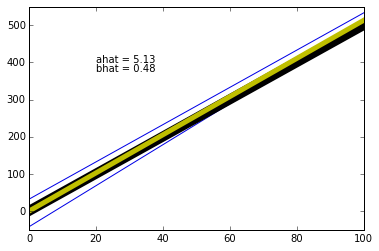

In [5]:
def genera_líneas(numero_lineas, numero_puntos):
    a = 5
    b = 1
    X = np.linspace(0, 100, numero_puntos)
    Y = np.empty((len(X), numero_lineas))
    for i in range(Y.shape[1]):
        eps = np.random.normal(scale = 100, size = numero_puntos)
        Y[:,i] = a * X + b + eps
        ahat, bhat = np.polyfit(X, Y[:,i], deg = 1)
        plt.plot(X, X * ahat + bhat, color = (0,0,0.9))
    plt.plot(X, X * a + b, 'k', lw = 10)
    ahat, bhat = np.polyfit(X, Y.mean(axis = 1), deg = 1)
    plt.plot(X, X * ahat + bhat, 'y', lw = 5)
    plt.text(20, 400, 'ahat = {:3.2f}'.format(ahat))
    plt.text(20, 375, 'bhat = {:3.2f}'.format(bhat))
    plt.xlim(0,100)
    plt.ylim(-50,550)
    
interact(genera_líneas, 
         numero_lineas = widgets.FloatSliderWidget(min = 3, 
                                                   max = 100, 
                                                   step = 1, 
                                                   value = 3, 
                                                   description = "Número de líneas"), 
         numero_puntos = widgets.FloatSliderWidget(min = 5, 
                                                   max = 100, 
                                                   step = 1, 
                                                   value = 5, description="Puntos para cada línea"))

Las diferencias que vemos en el anterior gráfico entre la línea negra y el resto de líneas es debido a que usamos una muestra (líneas azules) para intentar obtener características de una población más grande (línea negra). Si la muestra de datos es más grande o si usamos un mayor número de líneas vemos que, en promedio (línea amarilla), nos vamos acercando cada vez más al valor esperado. Como hemos comentado en el párrafo anterior, hay veces que las líneas pueden quedar por encima y a veces pueden quedar por debajo en mayor o menor proporción pero, en conjunto, vemos que a medida que crece el número de datos para cada línea o el número de líneas, nos vamos acercando a un valor promedio. Esto nos está indicando que en el caso de la estimación de los parámetros mediante el método de mínimos cuadrados es no sesgada ([unbiased](https://en.wikipedia.org/wiki/Bias_of_an_estimator)).

Muy bien, pero normalmente solo tenemos un conjunto de datos y solo podemos hacer una estimación con ese número de datos. En determinados rangos podemos estar subreestimando mientras que en otros rangos podemos estar infraestimando (o viceversa). 

¿Cómo podemos estimar el error de la estimación?

Para ello podemos usar el **error estándar** ([standard error](https://en.wikipedia.org/wiki/Standard_error)) usando las siguientes fórmulas para el caso de una regresión lineal simple:

$$SE(\hat{a})^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}$$

$$SE(\hat{b})^2 = \sigma^2[\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}]$$

siendo $\sigma^2=Var(\epsilon)$. 

Para que las fórmulas anteriores sean estrictamente válidas necesitamos que los errores $\epsilon_{i}$  para cada observación no estén correlacionados con la varianza $\sigma^2$. Normalmente podemos encontrar cierta correlación pero las fórmulas siguen siendo una buena aproximación.

En general, $\sigma^2$ no se conoce pero lo podemos obtener a partir de los datos. Su estimación se conoce como error estándar residual (residual standard error) y se puede obtener a partir de $RSE (también\ conocido\ como\ \hat{\sigma}) = \sqrt{RSS / (n - 2)}$. Siendo rigurosos, cuando $\sigma^2$ se obtiene a partir de la muestra deberiamos escribir el error estándar con una caperuza, e.g. $\hat{SE}(\hat{a})$, para indicar que es una estimación. Si en algún momento se nos olvida poner la caperuza tened en cuenta que nos referimos a una estimación.

### Intervalos de confianza

Los errores estándar se pueden usar para calcular intervalos de confianza. Un intervalo de confianza, por ejemplo al 95%, se define como el rango de valores que contendrá el valor verdadero desconocido del parámetro con una probabilidad del 95%. El rango se calcula a partir de los datos de la muestra y contiene un valor superior y un valor inferior. El intervalo de confianza al 95% para el parámetro $a$ en la regresión lineal se podría obtener, de forma aproximada (\*), usando:

$$\hat{a} \pm 2 · SE(\hat{a})$$

<div class="alert alert-info">(*) En realidad, el 2 de la fórmula anterior tiende al valor 1.96 cuando el número de grados de libertad aumenta, para el caso de un intervalo de confianza del 95%. Como nuestro número de grados de libertad es bastante inferior (n - 2 = 9) el valor de la fórmula correcto a usar, en este caso concreto, estaría alrededor de 2.262.</div>

Ese valor lo podemos obtener de la siguiente forma:

In [6]:
# 0.025 es 0.05 (5%) / 2 para tener en cuenta ambas colas
stats.t.isf(0.025, len(X)-2)

2.262157162740992

Por tanto, para obtener la probabilidad de un 95% de que el valor de $a$ esté incluido dentro de determinado intervalo usaremos la formula $[\hat{a} - 2.262 · SE(\hat{a}), \hat{a} + 2.262 · SE(\hat{a})]$.

Por tanto, si cogemos los datos del cuarteto de Anscombe que estamos usando tendremos que:

In [7]:
# Calculamos los parámetros del ajuste, a y b, ax+b
ahat, bhat = np.polyfit(X, Y, deg = 1)
# Calculamos los residuos
residuos = Y - (ahat * X + bhat)
# Calculamos la suma cuadrática de los residuos (RSS, residual sum of squares)
RSS = np.sum(residuos**2)
# Calculamos el error estándar de los residuos (RSE, residual standard error)
RSE = np.sqrt(RSS/(len(X)-2))
# Error estándar de la estimación de la pendiente
SEa = np.sqrt(RSE**2 / np.sum((X - X.mean())**2))
SEb = np.sqrt(RSE**2 * (1 / len(X) + X.mean()**2 / np.sum((X - X.mean())**2)))

print("Probabilidad del 95% de que a esté en el intervalo :", ahat - 2.262 * SEa, ahat + 2.262 * SEa)
print("Probabilidad del 95% de que b esté en el intervalo :", bhat - 2.262 * SEb, bhat + 2.262 * SEb)

Probabilidad del 95% de que a esté en el intervalo : 0.233388666744 0.766793151438
Probabilidad del 95% de que b esté en el intervalo : 0.455913668282 5.5442681499


En el anterior gráfico hemos mostrado las rectas teniendo en cuenta todos los extremos del rango tanto en $\hat{a}$ como en $\hat{b}$.

### Test de hipótesis

Los errores estándar se pueden usar, también, para comprobar hipótesis en los coeficientes. La prueba más evidente que se nos puede ocurrir sería conocer si existe relación entre $X$ e $Y$.. Vamos a montar nuestra prueba.

* La hipótesis nula, $H_{0}$, sería considerar que no hay relación entre $X$ e $Y$.
* Mientras que la hipótesis alternativa, $H_{a}$, sería considerar que existe esa relación.

Matemáticamente, habría que comprobar si la pendiente de la recta es nula y por tanto la relación se queda en $Y = b + \epsilon$. Por tanto, la prueba se podría representar como:

$$H_{0}: a = 0$$
$$H_{a}: a \neq 0$$

Para comprobar la hipótesis nula tendríamos que determinar que nuestra estimación de la pendiente, $\hat{a}$, está lo sucientemente lejos de cero de forma que podemos estar seguros que $a$ no es cero. Pero, ¿cuán lejos sería suficiente? Esto, por supuesto, depende de la precisión en el cálculo de $\hat{a}$ que dependerá del error estándar, $SE(\hat{a})$. Si el error estándar es pequeño, incluso valores pequeños de la estimación de la pendiente, $\hat{a}$ mostrarían evidencias de que existe relación entre $X$ e $Y$. Sin embargo, si el error estándar es grande, necesitariamos valores grandes de $\hat{a}$ para poder asegurar que existe tal relación entre $X$ e $Y$. En la práctica, se calcula un estadístico t de Student con la siguiente forma:

$$t = \frac{\hat{a} - 0}{SE(\hat{a})}$$

El valor cero en la anterior ecuación corresponde al valor que consideremos en la hipótesis, en este caso estamos comprobando que no haya relación entre las variables $X$ e $Y$ y eso se cumple considerando que la pendiente es igual a $0$, i.e. $a = 0$.

La ecuación anterior indica el número de desviaciones estándar que nuestra estimación de la pendiente está alejada de, en este caso, $0$. El valor crítico para considerar que aceptamos o rechazamos la hipótesis vendrá dado por una distribución t de Student de $n - 2$ grados de libertad. Con todo esto, es muy simple calcular la probabilidad de observar valores iguales o superiores a $|t|$ asumiendo $a = 0$. Esta probabilidad se conoce como *p-value*, que se puede interpretar como:

* un valor bajo de $p$ indica que es improbable que la asociación entre el predictor y la respuesta sea debida a la casualidad (siempre que no haya asociación real entre $X$ e $Y$).

Por tanto, si observamos un valor de $p$ bajo podemos inferir que existe asociación entre el predictor y la respuesta y podemos declarar que existe relación entre $X$ e $Y$ si el valor de $p$ es lo suficientemente bajo y podemos, por tanto, rechazar la hipótesis nula, $H_{0}$.

Veamos un ejemplo de todo esto con código:

In [8]:
# X e Y serán el primer conjunto del cuarteto de Anscombe 
# (https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
X = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
Y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

# Calculamos los parámetros del ajuste, a y b, ax+b
ahat, bhat = np.polyfit(X, Y, deg = 1)
# Calculamos los residuos
residuos = Y - (ahat * X + bhat)
# Calculamos la suma cuadrática de los residuos (RSS, residual sum of squares)
RSS = np.sum(residuos**2)
# Calculamos el error estándar de los residuos (RSE, residual standard error)
RSE = np.sqrt(RSS/(len(X)-2))
# Error estándar de la estimación de la pendiente
SEa = np.sqrt(RSE**2 / np.sum((X - X.mean())**2))
# Calculamos el estadístico t
t = ahat / SEa
# Calculamos el p-valor
# Aquí estamos usando scipy.stats 
# donde metemos los grados de libertad (len(X) - 2) 
# y calculamos la CDF del valor t
# Como calculamos la CDF y solo obtenemos una de las 
# colas lo multiplicamos por dos para considerar ambos extremos
p = 2 * (1 - stats.t(len(X) - 2).cdf(t))

print('Valor de la pendiente estimada, a = ', ahat)
print('RSS = ', RSS)
print('RSE = ', RSE)
print('Error estándar = ', SEa)
print('Valor de t = ', t)
print('Valor de p = ', p)

Valor de la pendiente estimada, a =  0.500090909091
RSS =  13.76269
RSE =  1.23660332273
Error estándar =  0.117905500596
Valor de t =  4.24145528889
Valor de p =  0.00216962887308


A partir de los valores anteriores podemos construir la siguiente tabla resumen:

<table class="table">
 <thead>
  <tr>
   <th></th>
   <th>Coeficiente</th>
   <th>Error Estándar</th>
   <th>estadístico t de Student</th>
   <th>valor - p</th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>Pendiente</td>
   <td>0.500</td>
   <td>0.117</td>
   <td>4.241</td>
   <td>0.002</td>
  </tr>
 </tbody>
</table>

En la tabla anterior vemos que el valor-p está lejos de y es inferior a, por ejemplo, 0.05 que sería lo que indicaría un intervalo de confianza del 95%. El intervalo de confianza al 95% de la pendiente que calculamos unas cuantas líneas más arriba indicaba el siguiente rango $[0.233, 0.767]$ por lo que parece que podríamos rechazar la hipótesis nula y aceptar la hipótesis alternativa de que existe relación entre $X$ e $Y$ con cierta confianza.

<div class="alert alert-danger">A pesar de lo dicho anteriormente, tened en cuenta que las pruebas de hipótesis deberían guiar nuestra toma de decisiones, pero no hay que tomarlos de forma estricta ni confiar ciegamente en los mismos si tenemos ciertas incertidumbres (pocos datos, modelo poco preciso,...).</div>

### Estimando la precisión del modelo (bondad del ajuste o *goodness of fit*)

La calidad de un ajuste por regresión lineal se realiza usando, normalmente, dos cantidades, el $RSE$ (Residual Standard Error o error estándar de los residuos, visto brevemente más arriba) y el estadístico $R^2$.

#### RSE

El $RSE$ es una estimación de la desviación estándar del término de error, $\epsilon$. En otras palabras, es la cantidad promedio que la respuesta se desviará de la línea real de regresión. Como vimos anteriormente, se calcula usando la siguiente fórmula:

$$RSE = \sqrt{RSS / (n - 2)}$$

donde RSS (Residual Sum of Squares) se expresa como $RSS = \sum_{i=1}^{n}{r_i}^2 = \sum_{i=1}^{n}({y_{i} - \hat{y_{i}}})^2$.

En el ejemplo anterior hemos visto que el $RSE$ valía $1.24$, esto indica que cualquier predicción que hagamos de $Y$ basándonos en $X$ tendrá un error de $1.24$ unidades. Este error será aceptable o no dependiendo del problema en cuestión. Para conocer el error relativo podemos usar la siguiente fórmula:

$$Error\ relativo = (\frac{RSE}{\bar{y}}) · 100$$

Y en el ejemplo que estamos usando, el valor sería $16.5\%$, aproximadamente.

Como el $RSE$ se mide en las unidades de $Y$ no siempre puede parecer obvio si el resultado nos indica que el ajuste es bueno. Por ello es interesante obtener también el error relativo.

Debería parecer obvio que el valor $RSE$ debería ser siempre lo más bajo posible dentro de su contexto (bajo error relativo) para considerar el ajuste bueno a partir de este estadístico.

#### R<sup>2</sup>

$R^2$ proporciona una forma alternativa de calcular la bondad del ajuste. Toma forma de proporción, la proporción de varianza explicada, y su valor se restringe al intervalo [0,1] y es independiente de las unidades de $Y$.

Para calcular $R^2$ usamos la fórmula:

$$R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

donde $TSS$, la suma total de los cuadrados o *Total Sum of Squares*, mide la varianza total en la respuesta y se calcula como $TSS = \sum_{i=1}^{n}({y_{i} - \bar{y}})^2$. 

La fórmula de $R^2$ se puede ver como ( 1 - (cantidad de variabilidad que queda sin explicar después del cálculo de la regresión) / (cantidad de variabilidad inherente en la respuesta antes del cálculo de la regresión)) o, dicho de otra forma, $R^2$ mide la proporción de variabilidad en $Y$ que puede ser explicada usando $X$.

Si el valor de $R^2$ es alto, cercano a 1, indicará que una gran proporción de la variabilidad de la respuesta ha sido explicada por la regresión. Si, por otra parte, el valor es cercano a cero tenemos que la regresión no es capaz de explicar la variabilidad de la respuesta indicándonos que el modelo es erróneo, el error inherente, $\sigma^2$, es alto o que se combinan ambos problemas.

Calculemos el valor de $R^2$ con código:

In [9]:
# Calculamos ls suma total de los cuadrados
TSS = np.sum((Y - Y.mean())**2)
# Calculamos los residuos
residuos = Y - (ahat * X + bhat)
# Calculamos la suma cuadrática de los residuos (RSS, residual sum of squares)
RSS = np.sum(residuos**2)

R2 = 1 - RSS/TSS

print(R2)

0.666542459509


Vemos que $X$ sería capaz de explicar 2/3 de la variabilidad en $Y$.

¿Cuándo será bueno el valor de $R^2$? Normalmente, querremos que el valor sea lo más cercano posible a 1 pero también dependerá del problema concreto para decidir si un valor más bajo lo consideramos como adecuado.

$R^2$ es una medida de la relación lineal entre $X$ e $Y$. El coeficiente de correlación, definido como:

$$Cor(X,Y) = \frac{\sum_{i=1}^{n}({x_{i} - \bar{x}})({y_{i} - \bar{y}})}{\sqrt{\sum_{i=1}^{n}({x_{i} - \bar{x}})^2}\sqrt{\sum_{i=1}^{n}({y_{i} - \bar{y}})^2}}$$

también es una medida de la relación lineal entre $X$ e $Y$. Podríamos usar $r = Cor(X,Y)$ como medida de la bondad del ajuste en lugar de $R^2$. De hecho, en el caso concreto de la regresión lineal simple, $r^2 = R^2$. En el caso de la regresión lineal múltiple no podemos extender este hecho ya que la correlación mide la relación entre una variable y una respuesta pero no entre múltiples variables y una respuesta. El trabajo de obtener la relación entre varias variables corresponderá a $R^2$ en el caso de la regresión lineal múltiple.

Comprobemos que $r^2 = R^2$:

In [10]:
r2 = np.corrcoef(X, Y)[0,1]**2
print(r2, R2)
print(np.testing.assert_almost_equal(r2, R2, decimal = 7))

0.666542459509 0.666542459509
None


### Regresión lineal simple con statsmodels

Statsmodels es la librería de facto para hacer modelos y tests estadísticos. Aumenta enormemte las capacidades estadísticas nu Numpy y Scipy y se complementa muy bien con Pandas y scikit-learn.

Todo lo que hemos hecho hasta ahora se podría hacer de la siguiente forma:

In [11]:
result = sm.OLS(Y, sm.add_constant(X)).fit()
print(result.summary().tables[1])
print('R^2 = ', result.rsquared)

                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.026         0.456     5.544
x1             0.5001      0.118      4.241      0.002         0.233     0.767
R^2 =  0.666542459509


d:\users\X003621\AppData\Local\Continuum\Miniconda3\lib\site-packages\scipy\stats\stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  int(n))


### ¿Es nuestro modelo bueno?

Recordad la cita que hemos visto más arriba. No os enamoréis del modelo. 

Regresemos de nuevo al cuarteto de Anscombe donde cuatro grupos de datos presentan el mismo valor de $R^2$ y los mismos parámetros de la recta de ajuste.

In [12]:
ans_x_I = np.array([10.0, 8.0, 13.0, 9.0, 11.0,
                    14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
ans_y_I = np.array([8.04, 6.95, 7.58, 8.81, 8.33,
                    9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
ans_x_II = np.array([10.0, 8.0, 13.0, 9.0, 11.0,
                     14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
ans_y_II = np.array([9.14, 8.14, 8.74, 8.77, 9.26,
                     8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
ans_x_III = np.array([10.0, 8.0, 13.0, 9.0, 11.0,
                      14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
ans_y_III = np.array([7.46, 6.77, 12.74, 7.11, 7.81,
                      8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
ans_x_IV = np.array([8.0, 8.0, 8.0, 8.0, 8.0,
                     8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
ans_y_IV = np.array([6.58, 5.76, 7.71, 8.84, 8.47,
                     7.04, 5.25, 12.50, 5.56, 7.91, 6.89])
x = [ans_x_I, ans_x_II, ans_x_III, ans_x_IV]
y = [ans_y_I, ans_y_II, ans_y_III, ans_y_IV]

Y usemos statsmodels para obtener más información del modelo, a parte del valor de $R^2$

In [13]:
for X, Y in zip(x, y):
    result = sm.OLS(Y, sm.add_constant(X)).fit()
    print(result.summary().tables[1])
    print(result.rsquared)
    print('\n'*3)

                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.026         0.456     5.544
x1             0.5001      0.118      4.241      0.002         0.233     0.767
0.666542459509




                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.0009      1.125      2.667      0.026         0.455     5.547
x1             0.5000      0.118      4.239      0.002         0.233     0.767
0.666242033727




                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.0025      1.124      2.670      0.026         0.459     5.546
x1             0.4997      0.118      4.239      0.002         0.233     0.766
0.666324041067

Vaya, parece que los cuatro conjuntos de datos dan resultados similares para diferentes estadísticos. Los coeficientes del modelo son similares, los errores estándar también e incluso los intervalos de confianza salen parecidos.

¿Podemos afirmar categóricamente que el ajuste lineal es el más adecuado para todos los casos? Un primer paso debería ser el análisis exploratorio de los datos:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Thu, 13 Aug 2015   Prob (F-statistic):            0.00217
Time:                        17:07:12   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

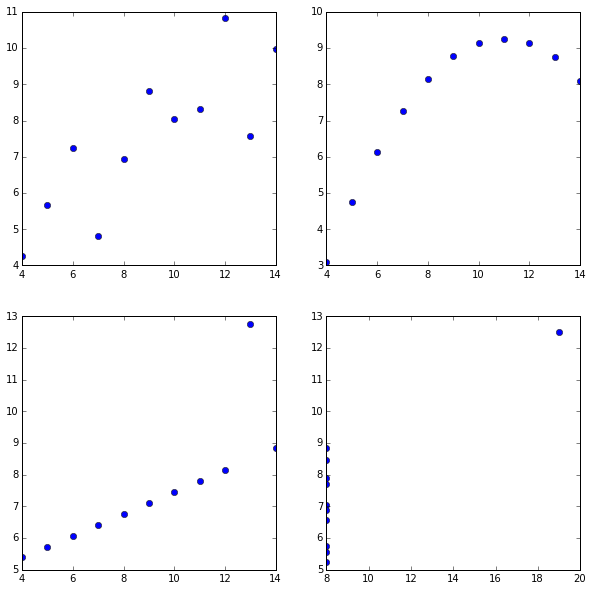

In [14]:
plt.figure(figsize = (10,10))
i = 1
for X, Y in zip(x, y):
    result = sm.OLS(Y, sm.add_constant(X)).fit()
    print(result.summary())
    plt.subplot(2, 2, i)
    plt.plot(X, Y, 'o')
    i += 1

El primer paso, antes de liarnos la manta a la cabeza y ponernos a calcular como locos debería ser un análisis exploratorio inicial de los datos incluyendo visualización y 'limpieza' en el caso de que fuera necesario.

Los gráficos de la derecha parece evidente que no tienen un comportamiento lineal. Otros modelos serían más adecuados. En el gráfico de abajo a la izquierda parece evidente que tenemos un *outlier* que habría que filtrar.

### Apuntes finales

Hemos hecho un breve repaso a través de uno de los modelos más simples que podemos usar para regresión (aprendizaje supervisado). Pero como siempre, solo tenemos una parte de la película y a partir de esa parte, a veces, es difícil conocer el final.

Cuando aplicamos este modelo podemos seguir una serie de pasos.

* Visualizar los datos.
* Visualizar los datos.
* Visualizar los datos.
* Visualizar los datos.
* Filtrar si es necesario.
* Considerar si existe una relación lineal entre las entradas y la salida y es razonable aplicar este modelo.
* Visualizar los residuos (homocedasticidad/heterocedasticidad, lineal/no lineal,...).
* Realizar una serie de tests que nos permitan no descartar la presunción de que el modelo es lineal (otros además de los que hemos hecho, statsmodels al rescate) y aplicable a nuestro problema de forma satisfactoria.
* Si la cantidad de información lo permite realizar validaciones cruzadas y comparar con otros modelos posibles.
* No enamorarte del modelo.

### Referencias

* [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Fourth%20Printing.pdf). Gran parte de toda la explicación sigue parte del capítulo 3 de este libro. En algunos puntos he intentado extender un poco la información del libro para hacerlo más accesible.

* [Entrada en el blog de Connor Johnson](http://connor-johnson.com/2014/02/18/linear-regression-with-python/). Una referencia completa a regresión lineal usando statsmodels explicando el significado de muchas cosas interesantes que ofrece la salida y que he obviado en este test por simplificarlo un poco.

* [Documentación de statsmodels](http://www.statsmodels.org/stable/index.html).

### Post-Data

Como siempre, si encontráis errores en el texto no dudéis en indicarlos:

* Haced un fork de https://github.com/Pybonacci/notebooks, modificad lo que consideréis y mandad un *pull request*.
* Comentad en la entrada del blog que corresponde a este notebook. http://pybonacci.org

Sería interesante que os descargáseis el notebook y lo ejecutáseis ya que hay algunas animaciones interactivas que os pueden ayudar a entender mejor algún concepto.